# Handwritten Digit Recognition

#### Importing the required libraries

In [1]:
import os
import sys
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler,scale
import warnings
from time import time
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing the CSV files

In [2]:
#n_of_rows = 0.10
#mnist_train = pd.read_csv('train.csv',skiprows= lambda i : i>0 and random.random() > n_of_rows)
mnist_train = pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')
mnist_train = mnist_train.sample(frac = 0.10)

#### Doing basic checks on the dataset

In [3]:
print(mnist_train.shape)
print(mnist_test.shape)

(4200, 785)
(28000, 784)


In [4]:
mnist_train.columns
mnist_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [5]:
mnist_train.info()
mnist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 195 to 16146
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 25.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [6]:
mnist_train.isnull().sum()[mnist_train.isnull().sum()> 0]

Series([], dtype: int64)

In [7]:
mnist_test.isnull().sum()[mnist_test.isnull().sum()> 0]

Series([], dtype: int64)

#### Now lets take a look at the dataset

In [8]:
mnist_train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13547,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38634,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36776,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#mnist_train.describe()

#### plot graph to understand the class imbalence 

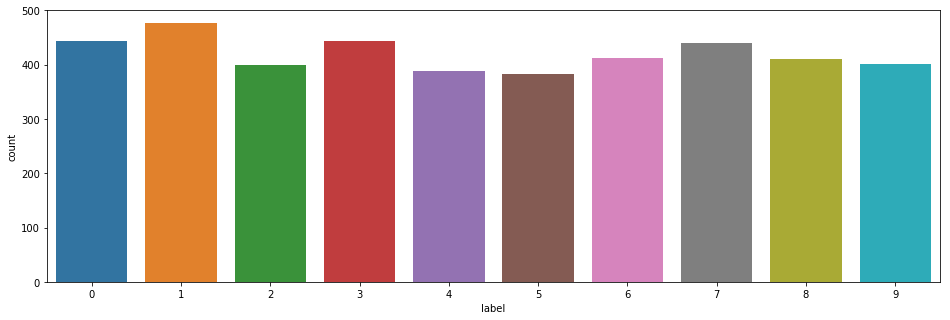

In [10]:
plt.figure(figsize=(16,5))
sns.countplot(mnist_train['label'])
plt.show()

#### Plotting first 20 datapoint as grayscale image to understand how our data actually look like

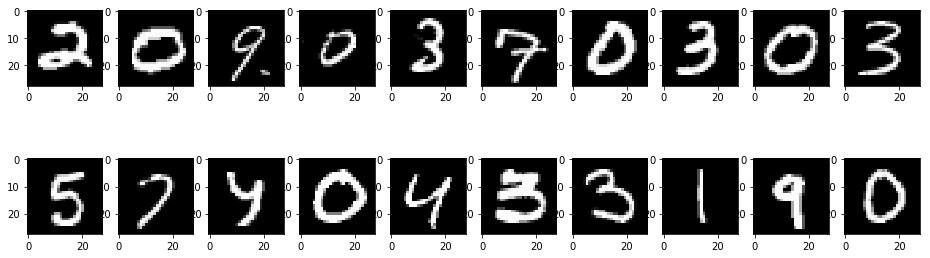

In [11]:
plt.figure(figsize=(16,5))
for i in range(0,20):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist_test.values.reshape(-1,28,28)[i],cmap = 'gray')

#### Lets create the dependent and independent variable

In [12]:
mnist_train_df = mnist_train

#### Creating dependent and independent variable

In [13]:
y  = mnist_train_df.pop('label')
X = mnist_train_df

#### Normalizing the data set

In [14]:
cols = X.columns
X[cols] = scale(X[cols])

#### Spliting the training data again into train and test set 

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=101)

#### Lets check for class imbalence in the train and test data

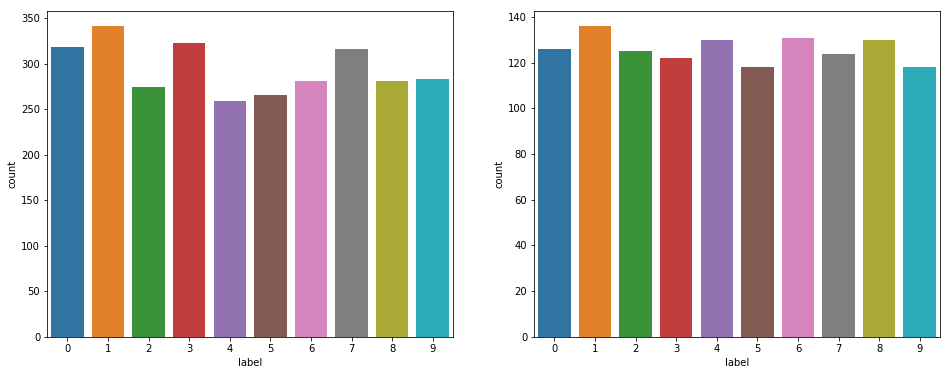

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(y_train)

plt.subplot(1,2,2)
sns.countplot(y_test)
plt.show()

#### lets create a baisc SVM model without hyperparameter tuning and check how the accuracy will come out

In [17]:
simple_model_l = SVC(kernel='linear')
simple_model_l.fit(X_train,y_train)

pred_train = simple_model_l.predict(X_train)
pred_test = simple_model_l.predict(X_test)

#pred_test = 

print(accuracy_score(y_true=y_train,y_pred=pred_train))
print(round(accuracy_score(y_true=y_test,y_pred=pred_test),2))

1.0
0.91


#### We can see there is overfitting so lets try out RBF and Poly as well 

In [18]:
simple_model_r = SVC(kernel='rbf')
simple_model_r.fit(X_train,y_train)

pred_train = simple_model_r.predict(X_train)
pred_test = simple_model_r.predict(X_test)

print(accuracy_score(y_true=y_train,y_pred=pred_train))
print(round(accuracy_score(y_true=y_test,y_pred=pred_test),2))

0.9772108843537415
0.91


In [19]:
simple_model_p = SVC(kernel='poly')
simple_model_p.fit(X_train,y_train)

pred_train = simple_model_p.predict(X_train)
pred_test = simple_model_p.predict(X_test)

print(accuracy_score(y_true=y_train,y_pred=pred_train))
print(round(accuracy_score(y_true=y_test,y_pred=pred_test),2))

0.7860544217687074
0.7


#### As we can see that rbf kernel function is performing better lets check the cross val score to be more sure about this


#### Lets check the cross validation score for all 3 models

In [20]:
lm_l = SVC(kernel='linear')
folds = KFold(n_splits=5, shuffle=True, random_state=101)
cross_val = cross_val_score(lm_l,X_train,y_train,scoring='accuracy',cv = folds,verbose=1)
print(cross_val.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8996598639455783


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.5s finished


In [21]:
lm_p = SVC(kernel='poly')
folds = KFold(n_splits=5, shuffle=True, random_state=101)
cross_val = cross_val_score(lm_p,X_train,y_train,scoring='accuracy',cv = folds,verbose=1)
print(cross_val.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.64421768707483


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.1s finished


In [22]:
lm_r = SVC(kernel='rbf')
folds = KFold(n_splits=5, shuffle=True, random_state=101)
cross_val = cross_val_score(lm_r,X_train,y_train,scoring='accuracy',cv = folds,verbose=1)
print(cross_val.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9071428571428571


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.4s finished


#### Now here also we can see that the RBF is performing better

## Grid Search: Hyperparameter Tuning

In [23]:
folds = KFold(n_splits=5, shuffle=True, random_state=101)
hyper_param = [{'gamma':[1e-2, 1e-3, 1e-4],
               'C':[1,10,100,1000]}]
model = SVC(kernel='rbf')
model_cv = GridSearchCV(estimator=model, 
                        param_grid=hyper_param,
                        scoring='accuracy',
                        cv=folds,
                        verbose=1, 
                        return_train_score=True)

model_cv.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
cv_result = pd.DataFrame(model_cv.cv_results_)
# cv_result['param_C'] = cv_result['param_C'].astype('int')

In [25]:
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.434242,0.552057,1.448519,0.023369,1,0.01,"{'C': 1, 'gamma': 0.01}",0.748299,0.741497,0.732993,...,0.731293,0.013041,12,0.999575,1.000000,1.000000,1.000000,1.000000,0.999915,0.000170
1,4.196375,0.388851,1.220339,0.304441,1,0.001,"{'C': 1, 'gamma': 0.001}",0.901361,0.882653,0.921769,...,0.903401,0.012516,6,0.971088,0.971514,0.967687,0.972789,0.971088,0.970833,0.001692
2,10.286492,1.591182,2.261065,0.485871,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.869048,0.836735,0.879252,...,0.864626,0.014654,8,0.891582,0.896684,0.887330,0.887755,0.896259,0.891922,0.004001
3,17.115579,3.694253,1.875963,0.191104,10,0.01,"{'C': 10, 'gamma': 0.01}",0.773810,0.756803,0.751701,...,0.752381,0.012617,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,4.328305,0.170925,1.198397,0.098124,10,0.001,"{'C': 10, 'gamma': 0.001}",0.913265,0.911565,0.937075,...,0.915646,0.013243,3,0.999575,1.000000,1.000000,1.000000,1.000000,0.999915,0.000170


In [26]:
gamma_01 = cv_result[cv_result.param_gamma==0.01]
gamma_001 = cv_result[cv_result.param_gamma==0.001]
gamma_0001 = cv_result[cv_result.param_gamma==0.0001]

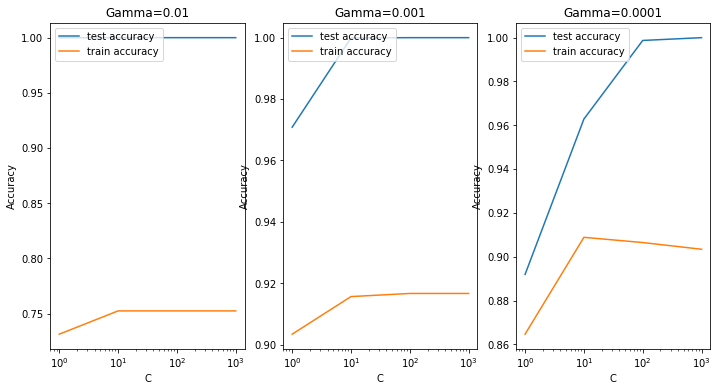

In [27]:
plt.figure(figsize=(16,6))

plt.subplot(1,4,1)
plt.plot(gamma_01.param_C,gamma_01.mean_train_score)
plt.plot(gamma_01.param_C,gamma_01.mean_test_score)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(1,4,2)
plt.plot(gamma_001.param_C,gamma_001.mean_train_score)
plt.plot(gamma_001.param_C,gamma_001.mean_test_score)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


plt.subplot(1,4,3)
plt.plot(gamma_0001.param_C,gamma_0001.mean_train_score)
plt.plot(gamma_0001.param_C,gamma_0001.mean_test_score)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# plt.subplot(1,4,4)
# plt.plot(gamma_001.param_C,gamma_001.mean_train_score)
# plt.plot(gamma_001.param_C,gamma_001.mean_test_score)
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title("Gamma=0.01")
# plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
# plt.xscale('log')

In [28]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9166666666666666 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


### Lets create the model with the best params

In [29]:
model_final = SVC(kernel='rbf',C=10,gamma=0.001)
model_final.fit(X_train,y_train)

y_pred_val = model_final.predict(X_test)

print('accuracy=',accuracy_score(y_test,y_pred_val))

accuracy= 0.9230158730158731


#### Now lets check the precision and recal score for our final model

In [30]:
print(classification_report(y_test,y_pred_val,labels=[0,1,2,3,4,5,6,7,8,9]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       126
           1       0.95      0.99      0.97       136
           2       0.92      0.86      0.89       125
           3       0.93      0.96      0.94       122
           4       0.90      0.93      0.91       130
           5       0.96      0.92      0.94       118
           6       0.98      0.92      0.94       131
           7       0.79      0.93      0.86       124
           8       0.96      0.88      0.92       130
           9       0.92      0.85      0.88       118

   micro avg       0.92      0.92      0.92      1260
   macro avg       0.93      0.92      0.92      1260
weighted avg       0.93      0.92      0.92      1260



#### Here we can see that the classwise scores are quite good as we can see the sensitivity/recall is giving good score with identifying the correct label

#### Lets visualize also some of the predicted value and actual value from test set

In [31]:
# Predicted
pd.DataFrame(y_pred_val).head(10)

,0
0,2
1,5
2,8
3,1
4,6
5,9
6,7
7,1
8,8
9,6


#### Note for down images the index will start from 1 so ignore the 0 index

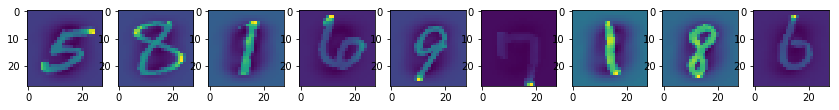

In [32]:
# Actual
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(1,10,i)
    plt.imshow(X_test.values.reshape(-1,28,28)[i])

#### Lets Check the confusion metrix

In [33]:
confusion_matrix(y_test,y_pred_val).T

array([[124,   0,   0,   0,   0,   0,   2,   0,   2,   2],
       [  0, 135,   0,   0,   1,   0,   0,   2,   3,   1],
       [  2,   0, 108,   0,   1,   0,   2,   1,   2,   1],
       [  0,   0,   1, 117,   1,   5,   0,   0,   2,   0],
       [  0,   0,   5,   0, 121,   3,   0,   2,   0,   4],
       [  0,   0,   0,   1,   0, 108,   0,   0,   4,   0],
       [  0,   0,   0,   1,   1,   1, 120,   0,   0,   0],
       [  0,   0,  10,   1,   2,   1,   7, 115,   1,   8],
       [  0,   1,   1,   1,   0,   0,   0,   0, 115,   2],
       [  0,   0,   0,   1,   3,   0,   0,   4,   1, 100]], dtype=int64)

## Now lets make the final prediction on the test data

In [34]:
mnist_test.shape

(28000, 784)

In [35]:
mnist_test.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Lets scale the columns

In [36]:
cols_test  = mnist_test.columns
mnist_test[cols_test] = scale(mnist_test[cols_test])

#### Lets make the prediction on the fianl set of data

In [37]:
mnist_test_pred = model_final.predict(mnist_test)

In [38]:
pd.DataFrame(mnist_test_pred).head(10)

,0
0,2
1,0
2,4
3,4
4,3
5,7
6,0
7,3
8,0
9,3


#### Below plot is starting from index 1

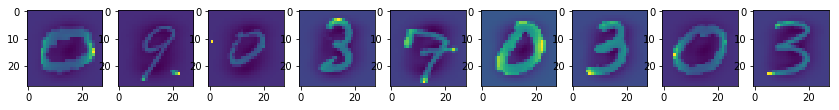

In [39]:
# Actual for final test data
plt.figure(figsize=(16,8))
for i in range(1,10):
    plt.subplot(1,10,i)
    plt.imshow(mnist_test.values.reshape(-1,28,28)[i])